In [20]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
nsamples = 100000
myrange = (0,8)
mybins = 40 # 0.2s for each bin
mybints = np.arange(0, 8, 8.0/40)

In [89]:
# mean = 0.5*2 + 1 = 2
load_times = np.random.exponential(0.5, nsamples)*2 + 1
load_times.mean()

1.9996824762398107

<a list of 40 Patch objects>

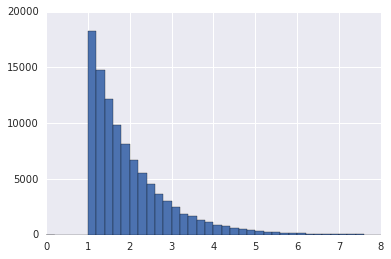

In [198]:
plt.hist(load_times, bins=mybins, range=myrange)[2]

In [164]:
giveup_times = np.random.normal(4, 1.5, nsamples)

<a list of 40 Patch objects>

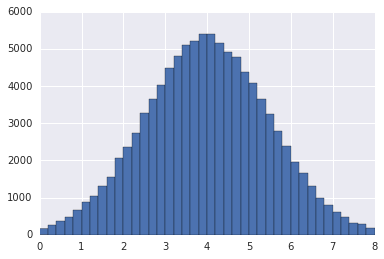

In [199]:
plt.hist(giveup_times, bins=mybins, range=myrange)[2]

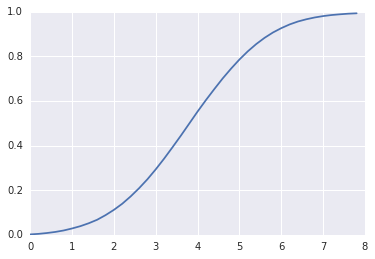

In [166]:
plt.plot(mybints, np.cumsum(np.histogram(giveup_times, bins=mybins, range=myrange)[0])/float(nsamples))

In [167]:
df = pd.DataFrame({'load': load_times, 'giveup': giveup_times})
df['success'] = df['load'] < df['giveup']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f704c908550>]], dtype=object)

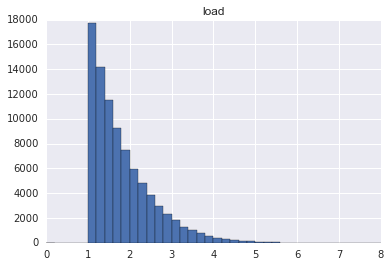

In [168]:
succ = df[df['success']]
succ.hist('load', bins=mybins, range=myrange)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f704c7aa0d0>]], dtype=object)

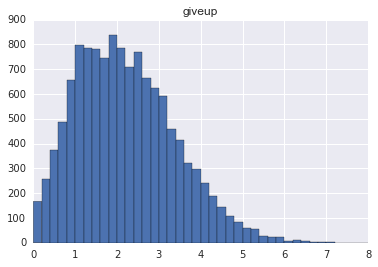

In [169]:
fail = df[df['success'] != True]
fail.hist('giveup', bins=mybins, range=myrange)

In [170]:
succ_hist = np.histogram(succ['load'], bins=mybins, range=myrange)[0]
fail_hist = np.histogram(fail['giveup'], bins=mybins, range=myrange)[0]
hists = pd.DataFrame(data={'time': mybints, 'succ': succ_hist, 'fail': fail_hist})

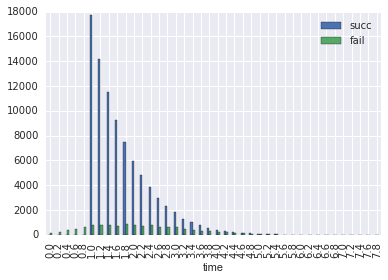

In [171]:
hists.plot(x='time', y=['succ', 'fail'], kind='bar')

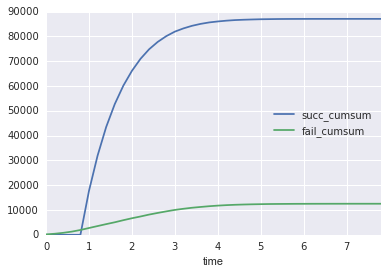

In [172]:
hists['succ_cumsum'] = np.cumsum(hists['succ'])
hists['fail_cumsum'] = np.cumsum(hists['fail'])
hists.plot(x='time', y=['succ_cumsum', 'fail_cumsum'])